In [1]:
import numpy as np

import os, sys, traceback
import cPickle as pickle

%matplotlib inline
import matplotlib.pylab as plt

from sigvisa import Sigvisa

In [31]:
#with open("/home/dmoore/python/sigvisa/logs/mcmc/01357/step_000495/pickle.sg", 'rb') as f:
#    sg = pickle.load(f)
    
with open("/home/dmoore/python/sigvisa/logs/mcmc/01361/step_000498/pickle.sg", 'rb') as f:
    sg = pickle.load(f)

#with open("/home/dmoore/python/sigvisa/logs/mcmc/01566/step_000067/pickle.sg", 'rb') as f:
#    sg = pickle.load(f)

In [35]:
params = ["tt_residual", "peak_offset", "amp_transfer", "peak_decay", "coda_decay"]

fits = {}
for wn in sg.station_waves["ELK"]:
    for (eid, phase) in wn.arrivals():
        if phase=="UA": continue
        tmvals = sg.get_template_vals(eid, wn.sta, phase, wn.band, wn.chan)
        #tmvals, _ = wn.get_template_params_for_arrival(eid, phase)
        vs = [tmvals[p] for p in params]        
        
        if eid not in fits:
            fits[eid] = {}
        
        fits[eid][phase] = vs

fingerprints = []
eids = []
phases= ["Pg", "Lg"]
X = []
for eid in fits.keys():
    fingerprints.append(np.concatenate([fits[eid][phase] for phase in phases]))
    eids.append(eid)
    ev = sg.get_event(eid)
    X.append((ev.lon, ev.lat, ev.depth))
        
eids = np.array(eids)
X = np.array(X)

In [36]:
print fingerprints

[array([ 0.33436089,  0.8888114 ,  8.18861793, -2.49984487, -3.56671848,
        0.26935117,  0.79149921,  9.4017787 , -0.0611304 , -3.6588457 ]), array([ -0.66268351,   1.11022907,  10.58403135,  -1.40470206,
        -3.92020086,  -1.16937179,   1.62063852,  10.544216  ,
        -2.62773653,  -2.2925264 ]), array([  0.77813863,   0.03855012,  11.4225046 ,  -2.18796955,
        -3.71035381,  -1.64193291,   1.66612421,  11.89416977,
        -0.67893914,  -3.12111814]), array([ -1.17682563,   2.34523824,  12.20855335,  -2.7852071 ,
        -4.08841909,  -6.58996463,   2.25961849,  14.4538563 ,
        -1.11714215,  -1.76606301]), array([  0.3619833 ,   0.17524845,  12.1308237 ,  -0.58650508,
        -3.88005661,   0.25759556,   0.18621897,  11.09616885,
        -2.8386698 ,  -1.88238233]), array([ -0.57284501,   2.22619617,  10.06936108,  -1.30530346,
        -3.73676894,  -0.92701283,   2.03853383,  10.00152466,
        -0.92181523,  -1.65190341]), array([ 0.97022546,  0.15465495,  9.70

2.26874887671


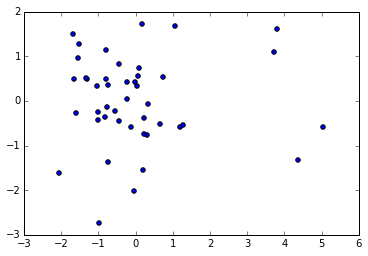

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(fingerprints).transform(fingerprints)
minComponent = np.min(np.diag(np.cov(X_r.T)))
print minComponent
X_r /= np.sqrt(minComponent)

plt.scatter(X_r[:, 0], X_r[:, 1])


In [46]:
fingerprints = np.asarray(fingerprints)
ws = [np.random.randn(10) for i in range(5)]
ws = np.asarray([w / np.linalg.norm(w) for w in ws])
projections = np.dot(fingerprints, ws.T)
print projections


[[  3.39434038   0.06496209   5.19416795   6.53367519  -0.71545045]
 [  2.36315626  -1.77634799   5.73210523   7.98785946   0.22137819]
 [  3.54081502  -0.12237702   6.98687186   7.75904843  -1.16004628]
 [  4.99618745  -0.32406335   6.76170104   8.34714511   1.22778325]
 [  2.06915861  -2.54940105   5.64206155   8.89739655  -0.6829639 ]
 [  2.35093038  -0.19719994   6.32273772   6.78770213   0.81550022]
 [  1.783224    -0.77455484   6.18606369   7.50782699   0.03583578]
 [  4.09465995  -1.2592765    3.10692072   7.58002308  -0.3570596 ]
 [  2.94943466  -0.84205098   6.55615293   8.63491934  -0.19376367]
 [  3.52017441  -2.1137171    4.02481963   8.32484412  -0.28469741]
 [  5.63902738  -1.20364978   5.1461373   10.27686178  -0.41214124]
 [  3.22383131  -3.03592792   5.94597543   9.94228037  -0.71663005]
 [  3.06233199  -0.04959319   7.63429884   7.07072081  -1.75116378]
 [  2.41701296  -2.04124095   5.19734557   8.1766859   -0.60942925]
 [  3.65622595  -2.58556365   7.33594089   9.693

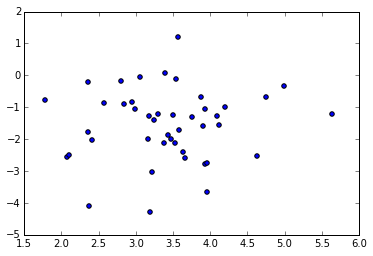

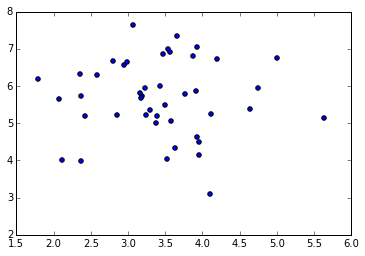

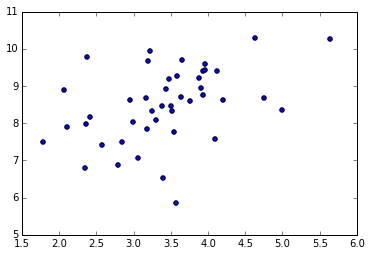

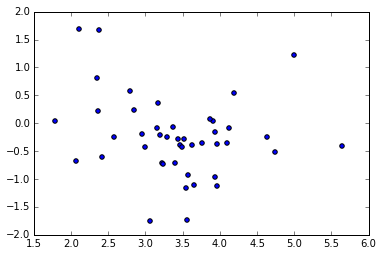

In [47]:
plt.scatter(projections[:, 0], projections[:, 1])
plt.figure()
plt.scatter(projections[:, 0], projections[:, 2])
plt.figure()
plt.scatter(projections[:, 0], projections[:, 3])
plt.figure()
plt.scatter(projections[:, 0], projections[:, 4])

In [48]:
from sklearn.covariance import EllipticEnvelope

clf = EllipticEnvelope(contamination=.20)
clf.fit(projections)
y_pred = clf.decision_function(projections).ravel()
print eids[y_pred < 0]

[ 1  3 13 15 27 28 31 36 40]


In [40]:
clf = EllipticEnvelope(contamination=.20)
clf.fit(fingerprints)
y_pred = clf.decision_function(fingerprints).ravel()
print eids[y_pred < 0]

[ 4 13 15 16 27 28 31 36 40]
